#### Importing the libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading the data

In [7]:
df = pd.read_csv (r"C:\Users\Fleet Data Analyst\Downloads\Billionaire Data\Billionaire.csv")

#### Data inspection

In [8]:
df.tail(100)

,Name,NetWorth,Country,Source,Rank,Age,Industry
2655,Wu Wei,$1.1 B,China,education,2524,53.0,Service
2656,Xiao Guoqing,$1.1 B,China,education,2524,52.0,Service
2657,George Yancopoulos,$1.1 B,United States,pharmaceuticals,2524,61.0,Healthcare
2658,Yao Lisheng,$1.1 B,China,electronics,2524,51.0,Technology
2659,Yu Faxiang,$1.1 B,China,"tourism, cultural industry",2524,49.0,Media & Entertainment
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified


In [9]:
df.shape

(2755, 7)

#### Research Questions

In [10]:
1. Which top 10 industries have the highest Networth?
2. Which countries have the highest Networth
3. Who are the top billionaires in Asia?
4. Who are top billionaires in Africa?
5. How many billionaires do we have in America?
6. Which countries have the least number of billionaires?

SyntaxError: invalid syntax (4024540878.py, line 2)

#### Data Cleaning/ Preprocessing

In [11]:
df.info()
# Checking the data types and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


In [12]:
# cleaning the Networth column
df['NetWorth']

0       $177 B
1       $151 B
2       $150 B
3       $124 B
4        $97 B
         ...  
2750      $1 B
2751      $1 B
2752      $1 B
2753      $1 B
2754      $1 B
Name: NetWorth, Length: 2755, dtype: object

In [13]:
# replacing B and $ with  blank
df['NetWorth']= df.NetWorth.apply(lambda x: str(x).replace('B', ''))
df['NetWorth'] = df.NetWorth.apply(lambda x: str(x).replace('$', ''))
df['NetWorth']

#changing the datatype
df['NetWorth']= df['NetWorth'].astype(float)

# or 

# df['NetWorth'] = df.NetWorth.apply(lambda x:float(x))

df['NetWorth']

0       177.0
1       151.0
2       150.0
3       124.0
4        97.0
        ...  
2750      1.0
2751      1.0
2752      1.0
2753      1.0
2754      1.0
Name: NetWorth, Length: 2755, dtype: float64

In [14]:
#confirm the datatypes
df.dtypes

Name         object
NetWorth    float64
Country      object
Source       object
Rank          int64
Age         float64
Industry     object
dtype: object

In [15]:
#Checking the missing data
data_missing = df[df.isna().Age]
data_missing 

,Name,NetWorth,Country,Source,Rank,Age,Industry
132,Hinduja brothers,14.9,United Kingdom,diversified,133,NaN,Diversified
255,Lam Wai-ying,9.1,Hong Kong,smartphone screens,256,NaN,Manufacturing
268,Chan Tan Ching-fen,8.8,Hong Kong,real estate,269,NaN,Real Estate
285,Anthony von Mandl,8.7,Canada,alcoholic beverages,274,NaN,Food & Beverage
294,Kuldip Singh & Gurbachan Singh Dhingra,8.4,India,paints,294,NaN,Manufacturing
...,...,...,...,...,...,...,...
2580,Lai Baosheng,1.1,China,consumer technology,2524,NaN,Technology
2639,Tseng Sing-ai,1.1,Taiwan,petrochemicals,2524,NaN,Manufacturing
2680,Carmen Daurella Aguilera,1.0,Spain,Coca-Cola bottler,2674,NaN,Food & Beverage
2714,Michael McCain,1.0,Canada,packaged meats,2674,NaN,Food & Beverage


In [16]:
# drop the missing view data frame
data_drop_Age = df.dropna()

In [17]:
#check the current shape
data_drop_Age.shape

(2676, 7)

In [18]:
# check duplicates
df.duplicated().sum()

0

In [19]:
# data quick statistics
df.describe()

,NetWorth,Rank,Age
count,2755.000000,2755.000000,2676.000000
mean,4.749220,1345.663521,63.113602
std,9.615358,772.669811,13.445153
min,1.000000,1.000000,18.000000
25%,1.500000,680.000000,54.000000
50%,2.300000,1362.000000,63.000000
75%,4.200000,2035.000000,73.000000
max,177.000000,2674.000000,99.000000


In [20]:
# check the min value (Age)
youngest_billionaire = df[df.Age == 18]
youngest_billionaire 

,Name,NetWorth,Country,Source,Rank,Age,Industry
940,Kevin David Lehmann,3.3,Germany,drugstores,925,18.0,Fashion & Retail


#### Data Analysis

In [21]:
#1 .Which top 10 industries have the highest Networth?

In [47]:
# writting a function to avoid repetion
def billionaires(y = '', x= ''):
    Top_hghst_Netwth = df.groupby(y)['x'].sum().reset_index()
    Top_10_ind_hghst_Netwth = Top_10_ind_hghst_Netwth.sort_values(by = x,ascending= False).head(10)
    return  Top

In [35]:
Top_10_ind_hghst_Netwth = df.groupby('Industry')['NetWorth'].sum().reset_index()
Top_10_ind_hghst_Netwth = Top_10_ind_hghst_Netwth.sort_values(by = 'NetWorth',ascending= False).head(10) 
Top_10_ind_hghst_Netwth

,Industry,NetWorth
16,Technology,2456.7
4,Fashion & Retail,1697.6
5,Finance & Investments,1527.9
10,Manufacturing,1119.9
6,Food & Beverage,1029.9
2,Diversified,868.1
13,Real Estate,815.8
8,Healthcare,790.7
11,Media & Entertainment,481.3
0,Automotive,467.5


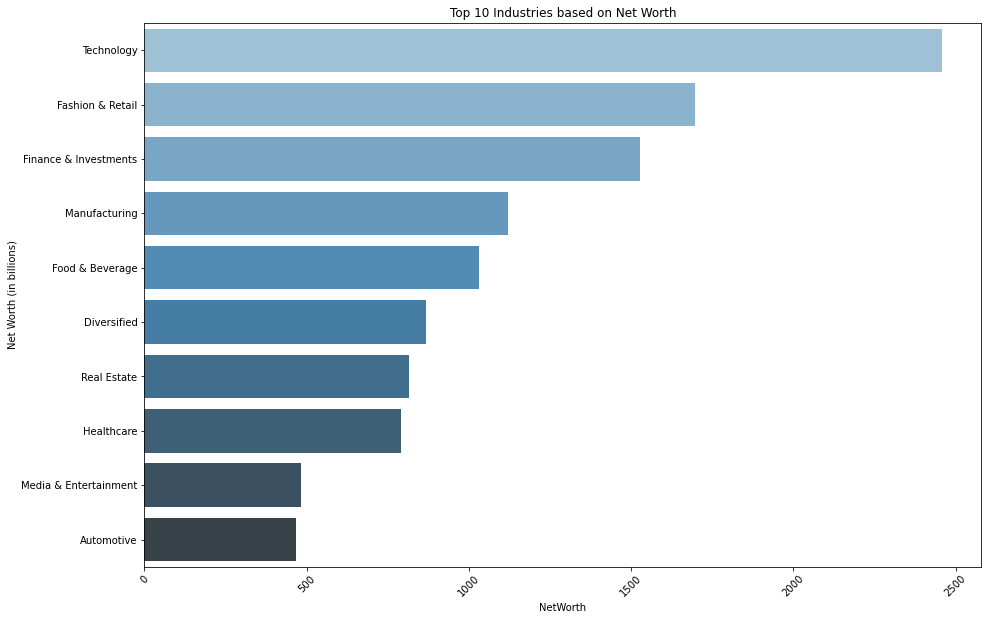

In [40]:
# plt.figure(figsize=(15, 16))
plt.figure(figsize=(15, 10))
plt.title('Top 10 Industries based on Net Worth')
sns.barplot(data=Top_10_ind_hghst_Netwth, y='Industry', x='NetWorth', palette='Blues_d')
plt.xlabel('NetWorth')
plt.xticks(rotation=45)
plt.ylabel('Net Worth (in billions)')
plt.show()

In [ ]:
#2. Which countries have the highest Networth

In [48]:
billionaires(y ='Country', x= 'NetWorth')

KeyError: 'Column not found: x'

In [30]:
billionaires(y= 'Country', x = 'NetWorth')

KeyError: 'x'

NameError: name 'x' is not defined

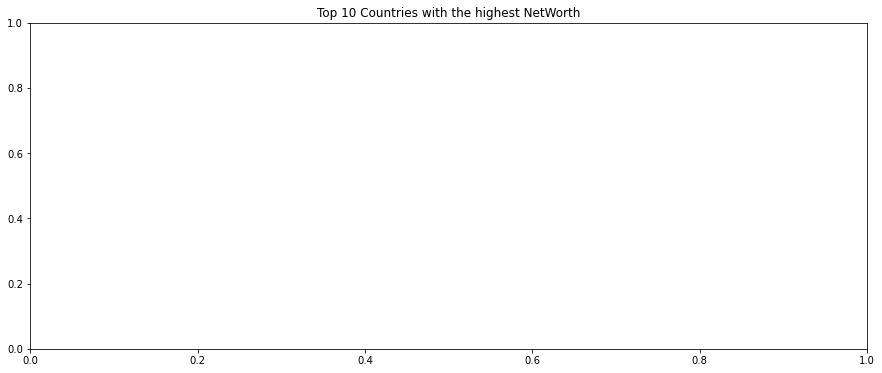

In [27]:
plt.figure(figsize=(15, 6))
plt.title('Top 10 Countries with the highest NetWorth')
sns.barplot(data=x, y='Country', x='NetWorth', palette='magma')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Net Worth (in billions)')
plt.show()